In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from torch import nn, optim
import torch.nn.functional as F

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Generate Time series data

In [2]:
T = 512  # Number of time steps
N = 100000
x = torch.linspace(0,T-1,steps=T)
data = torch.zeros((N, T))

for i in range(N):
    f = torch.randint(100, 200, (1,))
    data[i,:] = torch.sin(2*np.pi*x/f)

In [3]:
data.shape

torch.Size([100000, 512])

# Visualize two samples of time series

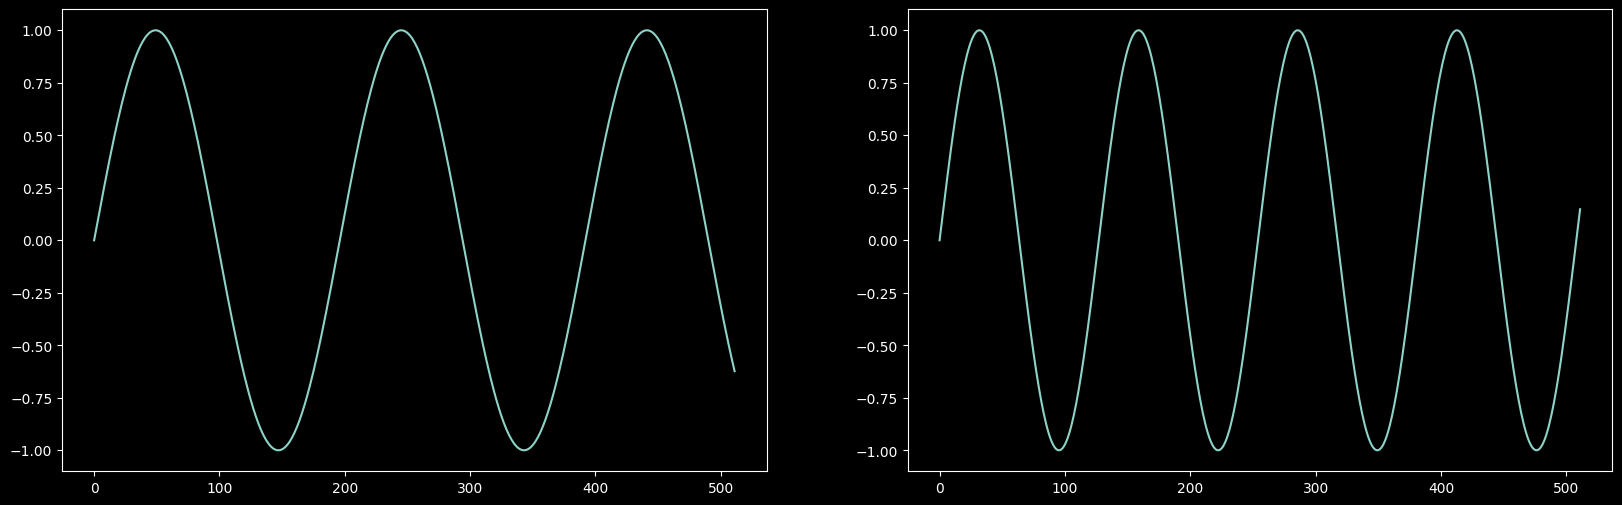

In [4]:
fig,axes = plt.subplots(1,2,figsize=(20,6))

for i in range(2):
  axes[i].plot(data[i])
plt.show()

In [5]:
type(data)

torch.Tensor

# Create a Transformer Model

In [6]:
transformer_model = nn.Transformer(d_model = 512, nhead = 8, num_encoder_layers = 1, num_decoder_layers = 1)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


# Create the target value for the transformer

In [7]:
output = torch.rand(1, 512)

# Define loss function and optimizer

In [8]:
lossfunc =  nn.MSELoss()
optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.0005)

# Train the model

In [ ]:
epochs = 50001
losses = torch.zeros(epochs)
transformer_model = transformer_model.to(device)
for epoch in range(epochs):

  # Selecting a batchsize  of 1.

  random_idx = np.random.choice(data.shape[0], size=1)

  X = data[random_idx,:]
  X = X.to(device)
  output = output.to(device)
  ypred = transformer_model(X, output)
  loss = lossfunc(ypred,X)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  losses[epoch] = loss.item()

  if (epoch % 5000) == 0:

      print(f' epochs : {epoch}  loss : {loss : 2.2f}')

 epochs : 0  loss :  1.42
 epochs : 5000  loss :  0.04
 epochs : 10000  loss :  0.03
 epochs : 15000  loss :  0.02
 epochs : 20000  loss :  0.02
 epochs : 25000  loss :  0.03
 epochs : 30000  loss :  0.02
 epochs : 35000  loss :  0.02
 epochs : 40000  loss :  0.02
 epochs : 45000  loss :  0.01
 epochs : 50000  loss :  0.01


# Get the predictions from model

In [ ]:
X_t = data[:10,:]  # Extracting first ten samples

In [ ]:
X_t.shape

torch.Size([10, 512])

In [ ]:
X_t = X_t.to(device)

In [ ]:
ypred_t = torch.zeros(10, 512)
for jj in range(10):
    d = X_t[jj,:].unsqueeze(0)
    yy = transformer_model(d, output)
    ypred_t[jj,:] = yy


# Visulaize first ten samples of original data

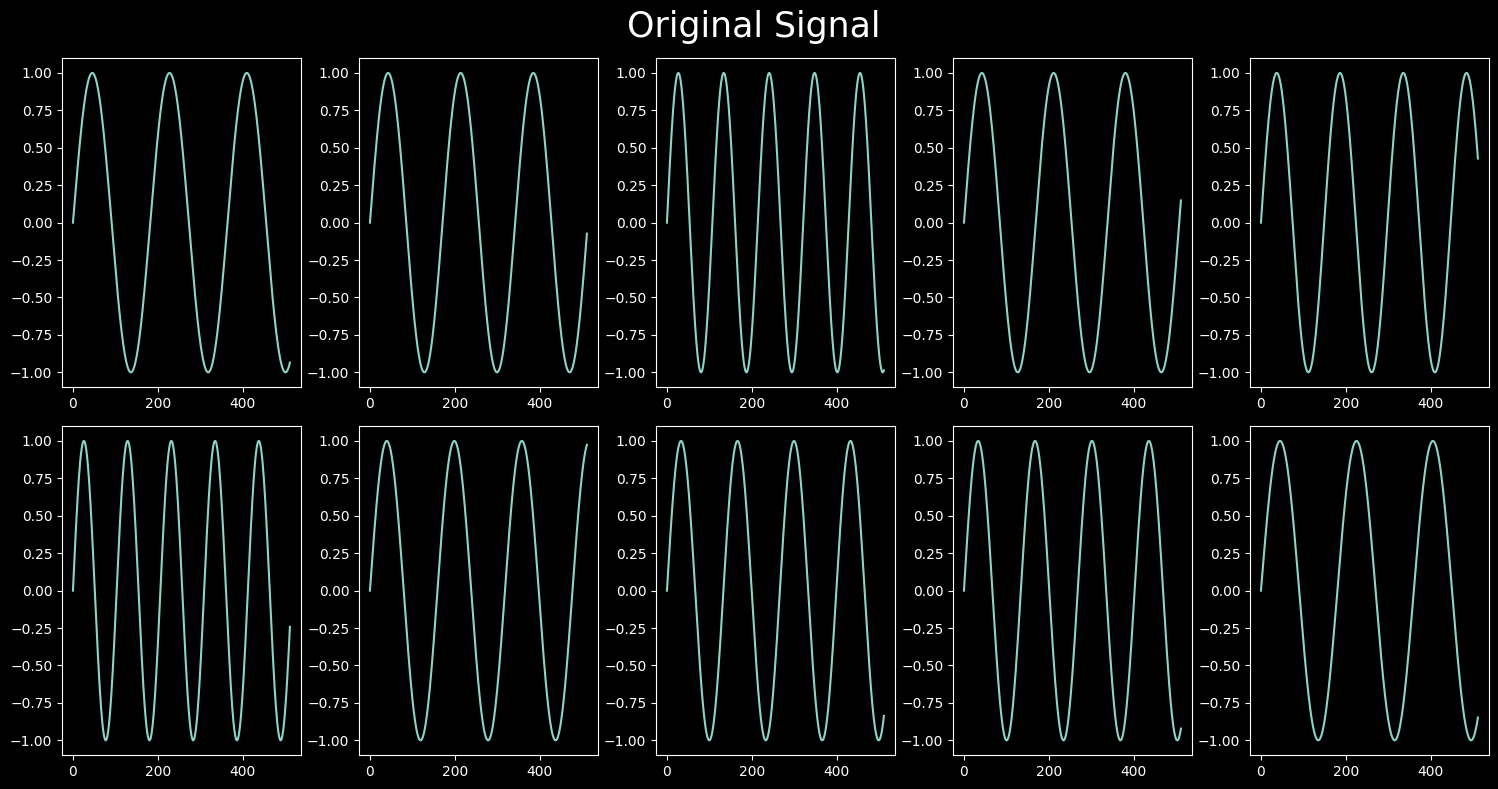

In [ ]:
fig, axs = plt.subplots(2,5,figsize=(15,8))

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.suptitle("Original Signal", fontsize = 25)

axs[0,0].plot(X_t[0,:].detach().cpu().numpy())

axs[0,1].plot(X_t[1,:].detach().cpu().numpy())

axs[0,2].plot(X_t[2,:].detach().cpu().numpy())

axs[0,3].plot(X_t[3,:].detach().cpu().numpy())

axs[0,4].plot(X_t[4,:].detach().cpu().numpy())

axs[1,0].plot(X_t[5,:].detach().cpu().numpy())

axs[1,1].plot(X_t[6,:].detach().cpu().numpy())

axs[1,2].plot(X_t[7,:].detach().cpu().numpy())

axs[1,3].plot(X_t[8,:].detach().cpu().numpy())

axs[1,4].plot(X_t[9,:].detach().cpu().numpy())

plt.tight_layout()

plt.show()

# Visulaize first ten samples of reconstructed signal

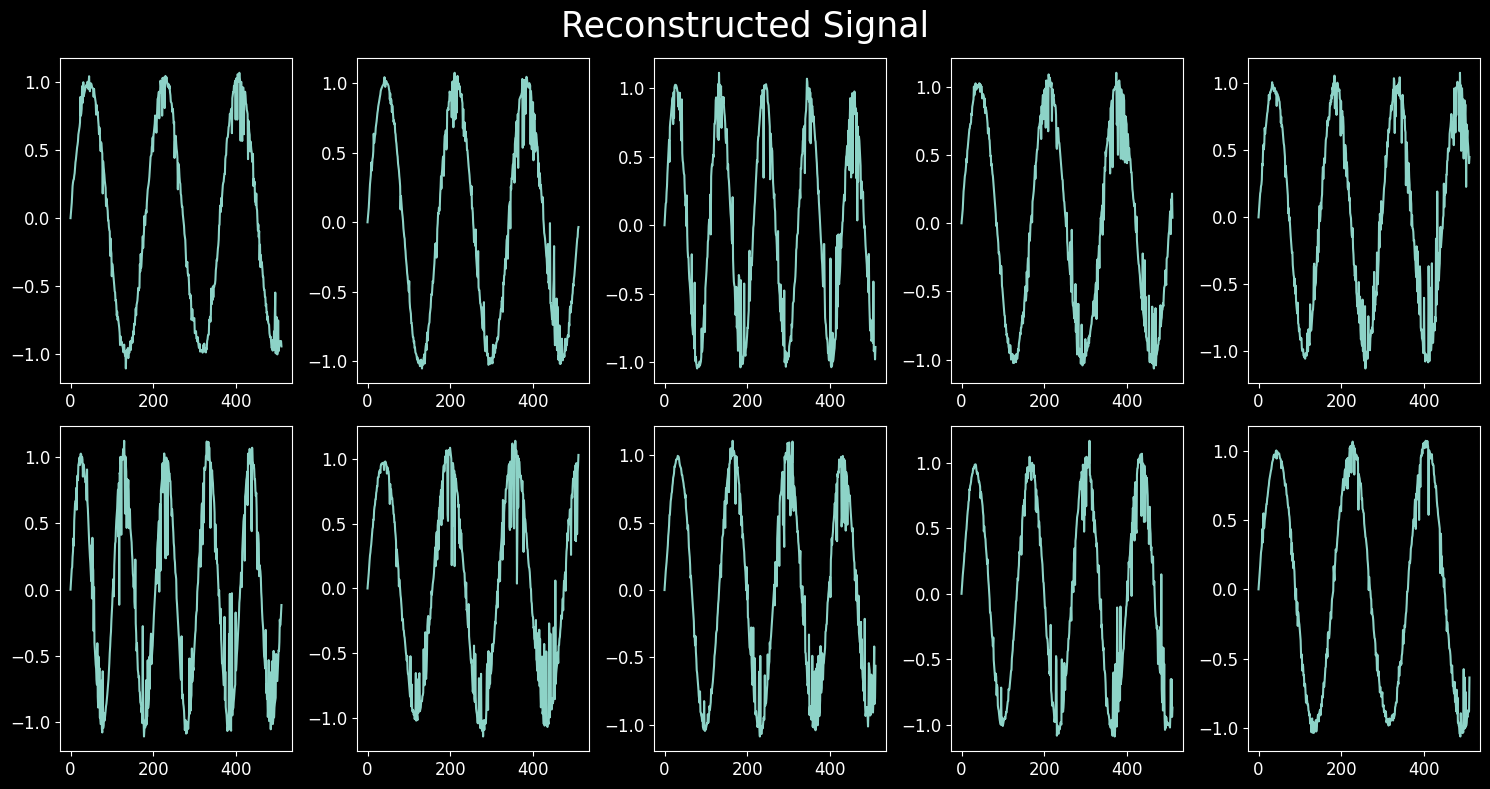

In [ ]:
fig, axs = plt.subplots(2,5,figsize=(15,8))

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.suptitle("Reconstructed Signal", fontsize = 25)

axs[0,0].plot(ypred_t[0,:].detach().cpu().numpy())

axs[0,1].plot(ypred_t[1,:].detach().cpu().numpy())

axs[0,2].plot(ypred_t[2,:].detach().cpu().numpy())

axs[0,3].plot(ypred_t[3,:].detach().cpu().numpy())

axs[0,4].plot(ypred_t[4,:].detach().cpu().numpy())

axs[1,0].plot(ypred_t[5,:].detach().cpu().numpy())

axs[1,1].plot(ypred_t[6,:].detach().cpu().numpy())

axs[1,2].plot(ypred_t[7,:].detach().cpu().numpy())

axs[1,3].plot(ypred_t[8,:].detach().cpu().numpy())

axs[1,4].plot(ypred_t[9,:].detach().cpu().numpy())

plt.tight_layout()

plt.show()

# Create a low pass filter to reduce the noise and pass the output from the filter

In [ ]:
def smooth(x,k=21):
  return np.convolve(x,np.ones(k)/k,mode='same')

In [ ]:
ypred_smooth = np.zeros((10, 512))
for jj in range(10):
    d = X_t[jj,:].unsqueeze(0)
    yy = transformer_model(d, output)
    yy = smooth(yy.squeeze().detach().cpu().numpy())
    ypred_smooth[jj,:] = yy

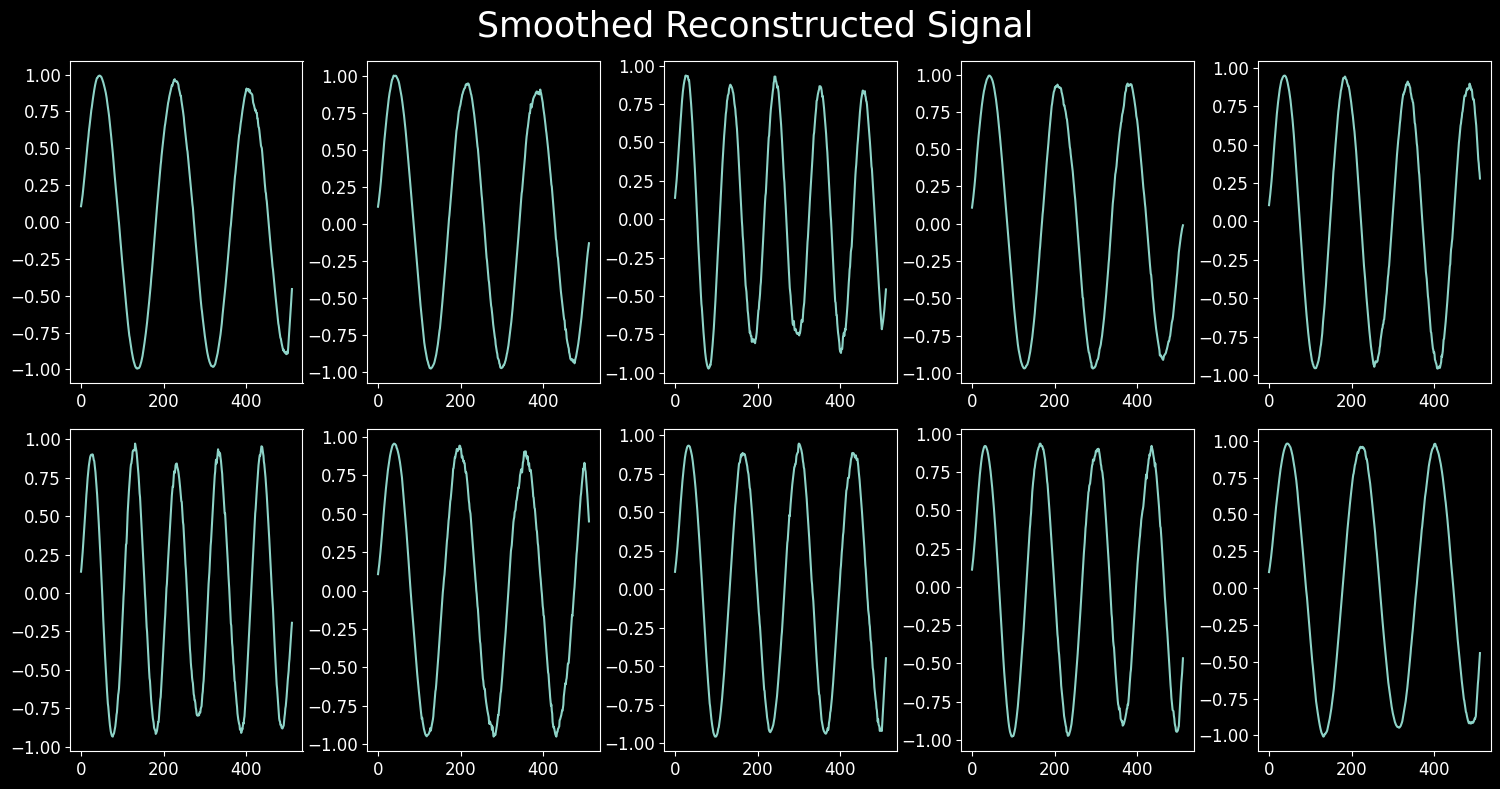

In [ ]:
fig, axs = plt.subplots(2,5,figsize=(15,8))

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.suptitle("Smoothed Reconstructed Signal", fontsize = 25)

axs[0,0].plot(ypred_smooth[0,:])

axs[0,1].plot(ypred_smooth[1,:])

axs[0,2].plot(ypred_smooth[2,:])

axs[0,3].plot(ypred_smooth[3,:])

axs[0,4].plot(ypred_smooth[4,:])

axs[1,0].plot(ypred_smooth[5,:])

axs[1,1].plot(ypred_smooth[6,:])

axs[1,2].plot(ypred_smooth[7,:])

axs[1,3].plot(ypred_smooth[8,:])

axs[1,4].plot(ypred_smooth[9,:])

plt.tight_layout()

plt.show()